# Del 4: Strojno učenje: K-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

## Introduction to K-Nearest Neighbors

### Problem definition

### Introduction to the data

In [2]:
import pandas as pd

dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [4]:
dc_listings.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD


### K-nearest neighbors

### Euclidean distance

In [5]:
import numpy as np

our_acc_value = 3

In [6]:
first_value = dc_listings.iloc[0]['accommodates']

In [7]:
first_value

4

In [8]:
np.abs(first_value - our_acc_value)

1

### Calculate distance for all observations

In [9]:
import numpy as np

new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))

In [10]:
dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

### Randomizing, and sorting

In [11]:
import numpy as np

np.random.seed(1)

In [12]:
np.random.permutation(5)

array([2, 1, 4, 0, 3])

In [13]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [14]:
dc_listings = dc_listings.sort_values('distance')

In [15]:
dc_listings.head(10)['price']

2926     $99.00
75       $99.00
1074    $125.00
115     $569.00
1080    $246.00
3042     $95.00
2384    $169.00
626     $130.00
3226     $91.00
1467     $94.00
Name: price, dtype: object

### Average price

In [16]:
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
2926,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$99.00,$40.00,NaN,2,93,27,38.934026,-77.039829,"Washington, D.C.",20010,DC,0
75,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,$99.00,$50.00,$100.00,1,19,0,38.878375,-77.008002,Washington,20003,DC,0


In [17]:
dc_listings['price'] = dc_listings['price'].str.replace(',', '').str.replace('$', '').astype('float')

In [18]:
dc_listings.head(7)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
2926,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,99.0,$40.00,NaN,2,93,27,38.934026,-77.039829,"Washington, D.C.",20010,DC,0
75,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,99.0,$50.00,$100.00,1,19,0,38.878375,-77.008002,Washington,20003,DC,0
1074,100%,86%,1,3,Entire home/apt,1.0,1.0,1.0,125.0,$25.00,NaN,2,1125,6,38.909847,-77.047664,Washington,20037,DC,0
115,87%,70%,190,3,Entire home/apt,1.0,1.0,1.0,569.0,$100.00,NaN,3,1125,0,38.894073,-77.019463,Washington,20001,DC,0
1080,92%,76%,206,3,Entire home/apt,1.0,1.0,2.0,246.0,$100.00,NaN,3,1125,0,38.908549,-77.048470,Washington,20037,DC,0
3042,100%,75%,1,3,Entire home/apt,0.0,1.0,2.0,95.0,$25.00,NaN,2,14,2,38.924819,-77.035690,Washington,20009,DC,0
2384,100%,86%,2,3,Entire home/apt,2.0,2.0,3.0,169.0,$75.00,$250.00,3,1125,34,38.922695,-77.041428,Washington,20009,DC,0


In [19]:
mean_price = dc_listings.iloc[0:5]['price'].mean()

In [20]:
mean_price

227.6

### Function to make predictions

In [21]:
np.random.seed(1)

dc_listings = pd.read_csv('data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [22]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbours = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbours.mean()
    return predicted_price

In [23]:
acc_one = predict_price(1)

In [24]:
acc_one

68.0

In [25]:
acc_two = predict_price(2)

In [26]:
acc_two

112.8

In [27]:
acc_four = predict_price(4)

In [28]:
acc_four

124.8

## Evaluating Model Performance

### Testing quality of predictions

In [29]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv("data/dc_airbnb.csv")

In [30]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [31]:
int(len(dc_listings)*0.75)

2792

In [32]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [33]:
def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

In [34]:
test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [35]:
test_df.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,predicted_price
2792,20%,75%,1,2,Entire home/apt,0.0,1.0,1.0,120.0,NaN,NaN,1,1125,8,38.922187,-77.032475,Washington,20009,DC,104.0
2793,100%,25%,2,3,Entire home/apt,2.0,2.0,1.0,140.0,$75.00,$150.00,2,1125,7,38.931681,-77.044739,Washington,20010,DC,177.4
2794,NaN,NaN,1,4,Entire home/apt,2.0,1.0,1.0,299.0,NaN,NaN,2,1125,5,38.933765,-77.031488,Washington,20010,DC,145.8


### Error Metrics

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

In [36]:
test_df['error'] = np.absolute(test_df['price'] - test_df['predicted_price'])

In [37]:
mae = test_df['error'].mean()

In [38]:
mae

56.29001074113876

###  Mean Squared Error

$MSE = \frac{1}{n} \sum_{k=1}^{n} (actual_1 - predicted_1)^{2} + \cdots + (actual_n - predicted_n)^{2}$

In [39]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [40]:
mse = test_df['squared_error'].mean()

In [41]:
mse

18646.525370569325

### Training another model

In [42]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [43]:
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

In [44]:
test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

In [45]:
test_df['squared_error'] = (test_df['price'] - test_df['predicted_price'])**2

In [46]:
mse = test_df['squared_error'].mean()

In [47]:
mse

18405.444081632548

### Root Mean Squared Error

In [48]:
rmse = mse ** (1/2)

In [49]:
rmse

135.6666653295221

### Comparing MAE and RMSE

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

$RMSE = \sqrt { \frac{ \sum_{k=1}^{n} (actual_1 - predicted_1)^2 + \cdots + (actual_n - predicted_n)^2 } {n} }$

In [50]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

In [51]:
mae_one = errors_one.mean()

In [52]:
rmse_one = (errors_one**2).mean()**(1/2)

In [53]:
mae_one

7.5

In [54]:
rmse_one

7.905694150420948

In [55]:
mae_two = errors_two.sum()/len(errors_two)

In [56]:
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))

In [57]:
mae_two

62.5

In [58]:
rmse_two

235.82302686548658

## Multivariate K-Nearest Neighbors

In [59]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [60]:
dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [61]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [62]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude          

In [63]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC


### Removing features

In [64]:
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC


In [65]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count']

In [66]:
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [67]:
dc_listings.isnull().sum()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

### Handling missing values

In [68]:
drop_columns = ['cleaning_fee', 'security_deposit']
dc_listings = dc_listings.drop(drop_columns, axis=1)

In [69]:
dc_listings = dc_listings.dropna(axis=0)

In [70]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [71]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,1,4,149
1593,2,1.0,1.5,1.0,85.0,1,30,49
3091,1,1.0,0.5,1.0,50.0,1,1125,1
420,2,1.0,1.0,1.0,209.0,4,730,2
808,12,5.0,2.0,5.0,215.0,2,1825,34


### Normalize columns

In [72]:
first_transform = dc_listings['maximum_nights'] - dc_listings['maximum_nights'].mean()

In [73]:
normalized_col = first_transform / first_transform.std()

In [74]:
normalized_col[0:5]

574    -0.016604
1593   -0.016603
3091   -0.016573
420    -0.016584
808    -0.016553
Name: maximum_nights, dtype: float64

In [75]:
normalized_listings = (dc_listings - dc_listings.mean()) / dc_listings.std()

In [76]:
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,-0.173345,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,-0.464148,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,-0.718601,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,0.437342,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,0.480962,-0.065038,-0.016553,0.646219


In [77]:
normalized_listings = (dc_listings - dc_listings.mean()) / dc_listings.std()
normalized_listings['price'] = dc_listings['price']
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


### Euclidean distance for multivariate case

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

$d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 }
$

In [78]:
from scipy.spatial import distance

In [79]:
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)

In [80]:
dist

0.852074

In [81]:
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]

In [82]:
first_listing

accommodates   -0.596544
bathrooms      -0.439151
Name: 574, dtype: float64

In [83]:
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

In [84]:
fifth_listing

accommodates    4.393004
bathrooms       1.264998
Name: 808, dtype: float64

In [85]:
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)

In [86]:
first_fifth_distance

5.272543124668404

### Introduction to scikit-learn

In [130]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [88]:
knn = KNeighborsRegressor(algorithm='brute')

###  Fitting a model and making predictions

In [131]:
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

In [132]:
train_features = train_df[['accommodates', 'bathrooms']]

In [133]:
train_target = train_df['price']

In [92]:
knn.fit(train_features, train_target)

KNeighborsRegressor(algorithm='brute')

In [93]:
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [94]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

In [95]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

In [96]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)

In [97]:
train_feature = train_df[train_columns]
train_target = train_df['price']

knn.fit(train_feature, train_target)

KNeighborsRegressor(algorithm='brute')

In [98]:
predictions = knn.predict(test_df[train_columns])

In [99]:
predictions[:5]

array([ 80.8, 251.2,  89.4,  80.8,  80.8])

### Calculating MSE using Scikit-Learn

In [134]:
from sklearn.metrics import mean_squared_error

train_columns = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
train_feature = train_df[train_columns]
train_target = train_df['price']
knn.fit(train_feature, train_target)
predictions = knn.predict(test_df[train_columns])

In [101]:
two_features_mse = mean_squared_error(test_df['price'], predictions)

In [102]:
two_features_mse

15600.51385665529

In [103]:
two_features_rmse = two_features_mse ** (1/2)

In [104]:
two_features_rmse

124.90201702396679

### Using more features

In [135]:
features = ['accommodates', 'bedrooms', 
            'bathrooms', 'number_of_reviews']

In [136]:
from sklearn.neighbors import KNeighborsRegressor

In [137]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)

In [138]:
four_features_rmse

115.42284176217056

### Using all features

In [139]:
features = train_df.columns.tolist()

In [140]:
features.remove('price')
features

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [141]:
knn = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn.fit(train_df[features], train_df['price'])
predictions = knn.predict(test_df[features])
four_features_rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)

In [142]:
four_features_rmse

124.31924883701363

## Hyperparameter Optimization

In [143]:
import pandas as pd

In [144]:
train_df = pd.read_csv('data/dc_airbnb_train.csv') 

In [145]:
test_df = pd.read_csv('data/dc_airbnb_test.csv')

In [146]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [147]:
hyper_params = list(range(1,6))

In [148]:
hyper_params

[1, 2, 3, 4, 5]

In [149]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [150]:
features

['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [151]:
rmse_values = list()

In [152]:
for hp in hyper_params:
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=hp)
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)
    rmse_values.append(rmse)

In [123]:
rmse_values

[162.37280661380788,
 122.88418315110553,
 120.74600573789563,
 127.32753342430728,
 118.70135487685818]

### Expanding grid search

In [153]:
hyper_params = list(range(1,21))
rmse_values = list()
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [154]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    rmse = mean_squared_error(test_df['price'], predictions) ** (1/2)
    rmse_values.append(rmse)

In [155]:
rmse_values

[162.37280661380788,
 122.88418315110553,
 120.74600573789563,
 127.32753342430728,
 118.70135487685818,
 116.8644114827833,
 119.5335680743671,
 121.87472331580857,
 121.12320961628912,
 121.00599769826847,
 121.3839832139696,
 121.87927087700685,
 121.3802368756651,
 121.56469838918429,
 121.53651569258713,
 121.94334139200811,
 121.78915596074519,
 121.58779942206421,
 121.55490412561835,
 121.14845432917468]

### Visualizing hyperparameter values

In [127]:
import matplotlib.pyplot as plt

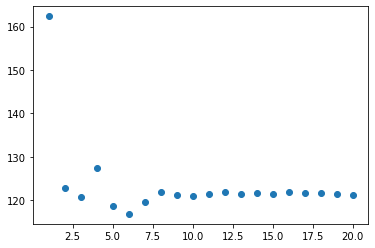

In [128]:
plt.scatter(x=hyper_params, y=rmse_values)
plt.show()

### Varying features and hyperparameters

In [158]:
hyper_parms = [x for x in range(1,21)]
mse_values = list()

In [160]:
features = train_df.columns.to_list()
features

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [161]:
features.remove('price')

In [162]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

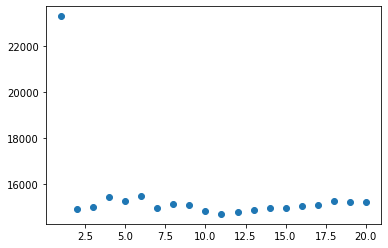

In [163]:
plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Practice the workflow

In [164]:
two_features = ['accommodates', 'bathrooms']

In [166]:
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [167]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

In [168]:
two_lowest_mse = two_mse_values[0]

In [171]:
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k, mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k +1 

In [172]:
two_lowest_mse, two_lowest_k

(14790.314266211606, 5)

**Tri značilke**

In [173]:
three_features = ['accommodates', 'bathrooms', 'bedrooms']

In [175]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)

In [176]:
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k, mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

three_hyp_mse[three_lowest_k] = three_lowest_mse

In [177]:
three_hyp_mse

{7: 13518.769009310208}

## Cross Validation

In [178]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [179]:
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

In [180]:
split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

### Holdout Validation

In [181]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

In [182]:
# First half
model = KNeighborsRegressor()
model.fit(train_one[['accommodates']], train_one['price'])
test_one["predicted_price"] = model.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], test_one["predicted_price"])**(1/2)

In [183]:
iteration_one_rmse

131.6207283081407

In [184]:
# Second half
model = KNeighborsRegressor()
model.fit(train_two[['accommodates']], train_two['price'])
test_two["predicted_price"] = model.predict(test_two[['accommodates']])
iteration_two_rmse = mean_squared_error(test_two['price'], test_two["predicted_price"])**(1/2)

In [185]:
iteration_two_rmse

128.77209995637674

In [186]:
avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

In [187]:
avg_rmse

130.19641413225872

### K-Fold Cross Validation

In [188]:
dc_listings.loc[dc_listings.index[0:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [189]:
dc_listings['fold'].value_counts()

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

In [190]:
dc_listings['fold'].isnull().sum()

0

### First iteration

In [191]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Training
train_iteration_one = dc_listings[dc_listings['fold'] != 1].copy()
test_iteration_one = dc_listings[dc_listings['fold'] == 1].copy()
model = KNeighborsRegressor()
model.fit(train_iteration_one[['accommodates']], train_iteration_one['price'])

# Predicting
labels = model.predict(test_iteration_one[['accommodates']])
test_iteration_one["predicted_price"] = labels
iteration_one_rmse = mean_squared_error(test_iteration_one['price'], test_iteration_one["predicted_price"])**(1/2)

In [192]:
iteration_one_rmse

112.04826596623559

### Function for training models

In [196]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

In [197]:
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in fold_ids:
        # Training
        model = KNeighborsRegressor()
        train = df[df['fold'] != fold].copy()
        test = df[df['fold'] == fold].copy()
        
        model.fit(train[['accommodates']], train['price'])
        
        # Predicting
        labels = model.predict(test[['accommodates']])
        test["predicted_price"] = labels
        rmse = mean_squared_error(test['price'], test["predicted_price"])**(1/2)
        fold_rmses.append(rmse)
    return fold_rmses

In [198]:
rmses = train_and_validate(dc_listings, fold_ids)

In [199]:
rmses

[112.04826596623559,
 144.38561957805769,
 124.88396829711334,
 136.89503611883998,
 112.45994078728297]

In [200]:
avg_rmse = np.mean(rmses)

In [201]:
avg_rmse

126.13456614950594

###  Performing K-Fold Cross Validation Using Scikit-Learn

In [202]:
from sklearn.model_selection import cross_val_score, KFold

    kf = KFold(n_splits, shuffle=False, random_state=None)

    cross_val_score(estimator, X, Y, scoring=None, cv=None)

In [203]:
kf = KFold(5, shuffle=True, random_state=1)

In [204]:
knn = KNeighborsRegressor()

In [205]:
mses = cross_val_score(knn, 
                       dc_listings[['accommodates']], 
                       dc_listings['price'], 
                       scoring='neg_mean_squared_error',
                       cv=kf)

In [206]:
mses

array([-28321.07511409, -13829.76987919, -22768.27742282,  -9285.8494086 ,
       -12532.78451613])

In [207]:
avg_rmse = np.mean(np.sqrt(np.absolute(mses)))

In [208]:
avg_rmse

129.01866963719164

###  Exploring Different K Values

In [210]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, 
                       dc_listings[['accommodates']], 
                       dc_listings['price'], 
                       scoring='neg_mean_squared_error',
                       cv=kf)
    rmses = np.sqrt(np.absolute(mses)) 
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print("folds: ", str(fold), "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
    

folds:  3 avg RMSE:  133.39155832923973 std RMSE:  11.086603336206089
folds:  5 avg RMSE:  129.01866963719164 std RMSE:  26.49026525380437
folds:  7 avg RMSE:  128.2563631358857 std RMSE:  24.433778651168502
folds:  9 avg RMSE:  127.32586680970088 std RMSE:  37.14784717325374
folds:  10 avg RMSE:  125.76801286044285 std RMSE:  34.17044630953882
folds:  11 avg RMSE:  128.05794633376306 std RMSE:  28.189791000247233
folds:  13 avg RMSE:  135.19672255133156 std RMSE:  37.393562781262155
folds:  15 avg RMSE:  129.36948920791744 std RMSE:  32.19005631512455
folds:  17 avg RMSE:  129.95026068075245 std RMSE:  42.23205089616785
folds:  19 avg RMSE:  123.23092426546866 std RMSE:  36.25629204751065
folds:  21 avg RMSE:  123.74230115930078 std RMSE:  40.953451986202275
folds:  23 avg RMSE:  124.80660657221455 std RMSE:  44.4282428992255


###  Bias-Variance Tradeoff

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png">

## Vaja: Predicting Car Prices

### Introduction To The Data Set

In [211]:
import pandas as pd
import numpy as np

In [212]:
# imena stolpcev

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [213]:
cars = pd.read_csv('data/imports-85.data', names=cols)

In [214]:
# Select only the columns with continuous values from
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
                          'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols].copy()

In [215]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning

In [216]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [217]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [218]:
numeric_cars = numeric_cars.astype('float')

In [219]:
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [220]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [221]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [222]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [223]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = price_col

In [224]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [226]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.248587,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.156781,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.139623,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.301887,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


### Univariate Model

In [229]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # naključno premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) / 2)
    
    # izberemo training set - prva polovica podatkov
    train_df = rand_df.iloc[0:last_train_row]
    
    #izberemo test set - druga polovica podatkov
    test_df = rand_df.iloc[last_train_row:]
    
    # streniramo model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # izračunamo napoved za testne podatke
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # izračunamo in vrnemo RMSE
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

Preizkusimo model nad vsakim stolpcem posebej

In [230]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# se sprehodimo skozi stolpce
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Sprejme parameter k

In [231]:
def knn_train_test(train_col, target_col, df, k_values):
    np.random.seed(1)
    
    # naključno premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) / 2)
    
    # izberemo training set - prva polovica podatkov
    train_df = rand_df.iloc[0:last_train_row]
    
    #izberemo test set - druga polovica podatkov
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
        # streniramo model
        knn.fit(train_df[[train_col]], train_df[target_col])

        # izračunamo napoved za testne podatke
        predicted_labels = knn.predict(test_df[[train_col]])

        # izračunamo in vrnemo RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

In [232]:
k_values = [1,3,5,7,9]
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# se sprehodimo skozi stolpce
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars, k_values=k_values)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


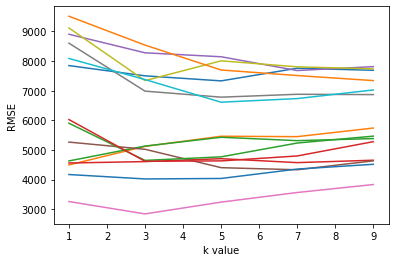

In [233]:
import matplotlib.pyplot as plt

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

### Multivariate Model

In [234]:
def knn_train_test(train_col, target_col, df, k_values=[5]):
    np.random.seed(1)
    
    # naključno premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) / 2)
    
    # izberemo training set - prva polovica podatkov
    train_df = rand_df.iloc[0:last_train_row]
    
    #izberemo test set - druga polovica podatkov
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
        # streniramo model
        knn.fit(train_df[train_col], train_df[target_col])

        # izračunamo napoved za testne podatke
        predicted_labels = knn.predict(test_df[train_col])

        # izračunamo in vrnemo RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

In [236]:
feature_avg_rmse = {}

for k, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [237]:
sorted_features = sorted_series_avg_rmse.index

In [238]:
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

In [239]:
k_rmse_results = {}

for nr_best_feats in range(2,9):
    k_rmse_results[f'{nr_best_feats} best features'] = knn_train_test(sorted_features[:nr_best_feats], 'price', numeric_cars)
    
k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539},
 '7 best features': {5: 3359.9444892279203},
 '8 best features': {5: 3647.155382671067}}

### Hyperparameter Tuning

In [240]:
def knn_train_test(train_col, target_col, df, k_values=[i for i in range(1,25)]):
    np.random.seed(1)
    
    # naključno premešamo dataset
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # najdemo index za polovico dataseta
    last_train_row = int(len(rand_df) / 2)
    
    # izberemo training set - prva polovica podatkov
    train_df = rand_df.iloc[0:last_train_row]
    
    #izberemo test set - druga polovica podatkov
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
        # streniramo model
        knn.fit(train_df[train_col], train_df[target_col])

        # izračunamo napoved za testne podatke
        predicted_labels = knn.predict(test_df[train_col])

        # izračunamo in vrnemo RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

In [241]:
k_rmse_results = {}

for nr_best_feats in range(2,8):
    k_rmse_results[f'{nr_best_feats} best features'] = knn_train_test(sorted_features[:nr_best_feats], 'price', numeric_cars)
    
k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

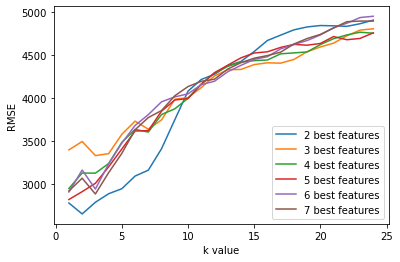

In [242]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=f"{k}")
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Najboljša izbira (engine-size, horsepower) k = 2